## Manifold Learning on an S-curve

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from jupyterthemes import jtplot
jtplot.style()

### Load Data

In [2]:
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
1478  0.088777  1.057655 -0.003948
656  -0.949352  1.104313 -1.314216
1171 -0.409596  0.207268  0.087733
1499  0.388796  1.398687  1.921324
1424  0.751123  1.756094 -0.339837
1242  0.996306  0.442933 -0.914132
718  -0.277739  0.160806  1.960657
305  -0.590560  1.400968  0.193007
838  -0.725225  0.909113 -1.688512
216   0.511661  0.916913 -1.859188


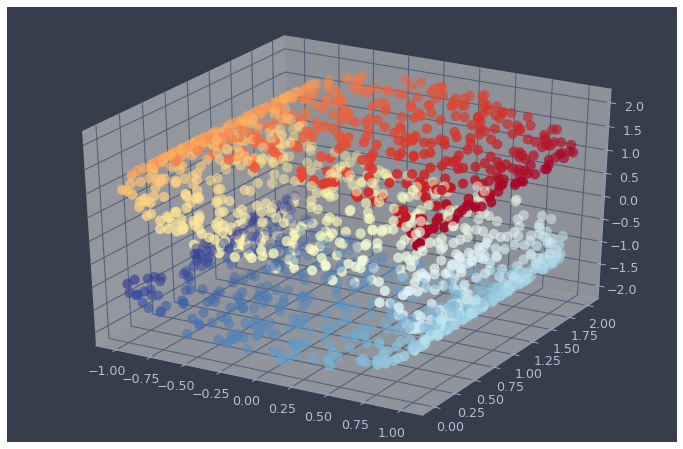

In [3]:
X, color = generate_s_curve(datasets.samples_generator.make_s_curve)

## Manifold Learning

In [12]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1427  0.062159 -0.637939
1030 -0.180817  0.205204
1482  0.443855  0.385659
1268  0.207492 -0.050120
674  -0.003824  0.374704
1176 -0.556888  0.424899
361  -0.295165 -0.409832
617  -0.333323  0.253433
1297 -0.040380  0.071991
831   0.030190 -0.486741


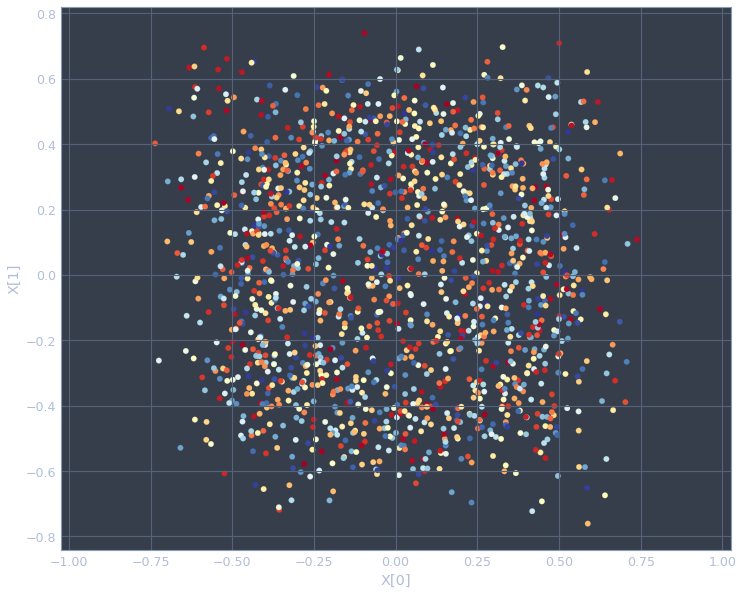

In [20]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1287  0.163682  0.683040
758  -1.968654 -0.264106
53   -1.673024  0.800116
860   1.812107 -0.608633
185   0.370695  0.741890
78    1.511425  0.763003
241   0.068380  0.305744
1162  1.627117  1.105367
373  -0.914213 -1.093153
491  -1.901327  0.520055


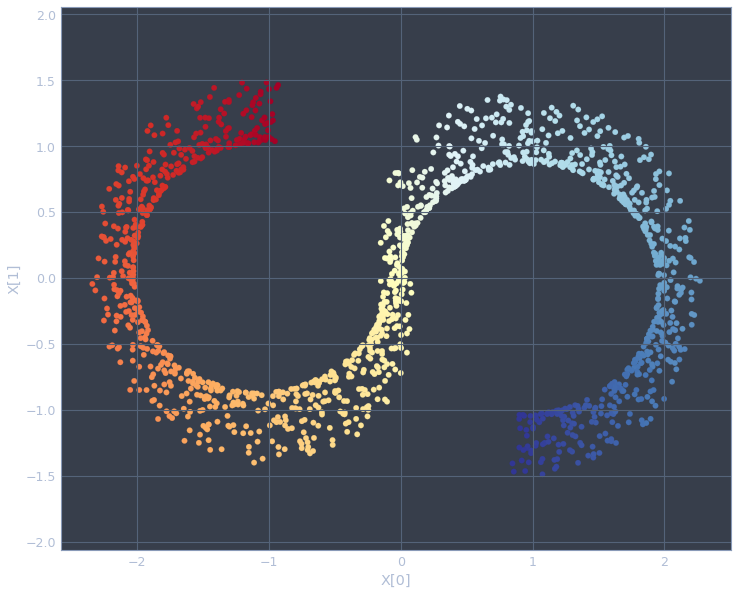

In [14]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

### Apply Spectral Embedding
* n_components : The dimension of the projected subspace. 
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
378  -0.000821  0.002476
1194 -0.001636  0.001114
565   0.002733 -0.001986
802   0.002969 -0.002883
1098 -0.002920 -0.002612
850   0.001596  0.001308
1176 -0.002862 -0.002394
1446 -0.002573 -0.001402
197  -0.002910 -0.002585
895  -0.002749 -0.001978


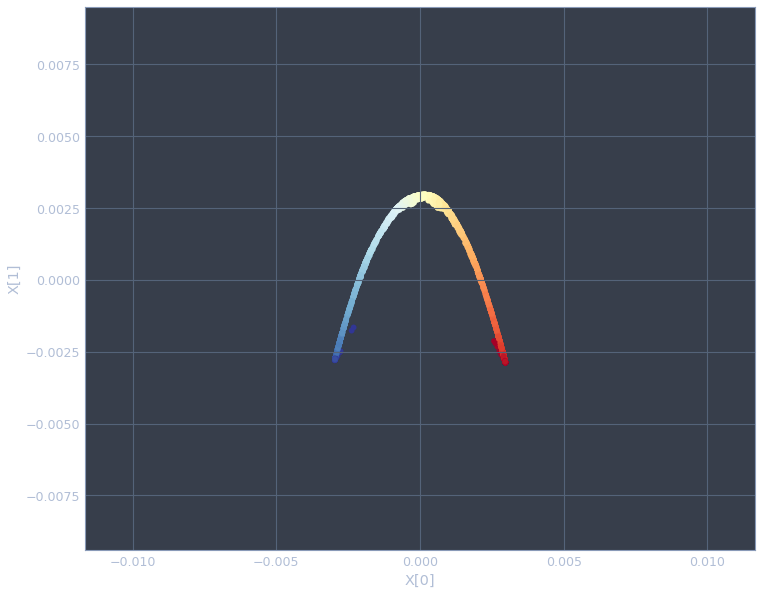

In [15]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply TSNE
* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

New shape of X :  (1500, 2)

Sample X : 

              0          1
1217  22.149891  -8.461726
836    5.877109   1.369833
1045  15.729226  17.141815
1274 -61.083916  18.595638
714  -37.679710 -20.308435
1138 -15.843353  -8.523551
1165  -8.515379   7.794744
1190 -38.694874 -23.973135
357   27.653887  15.396638
1450 -54.447899  18.868429


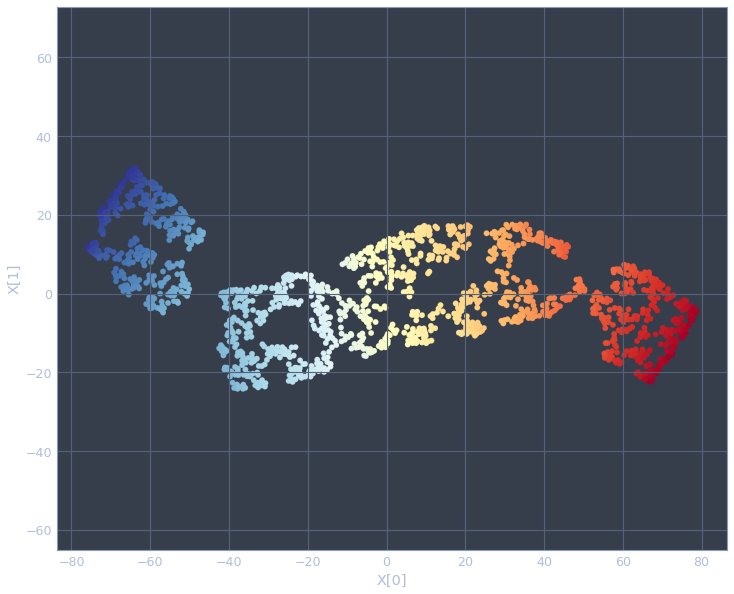

In [16]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

### Apply Isomap

* n_neighbors : number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.

* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
133   0.793837  0.948864
882   0.016107  0.812127
478  -2.244253 -0.044814
1327  0.558070  0.610978
728   2.308768 -0.804797
1332  0.610401 -0.953208
1493  4.674468  0.608273
459   3.551350  1.062286
903  -1.320564  0.962221
1059  3.784528 -0.754019


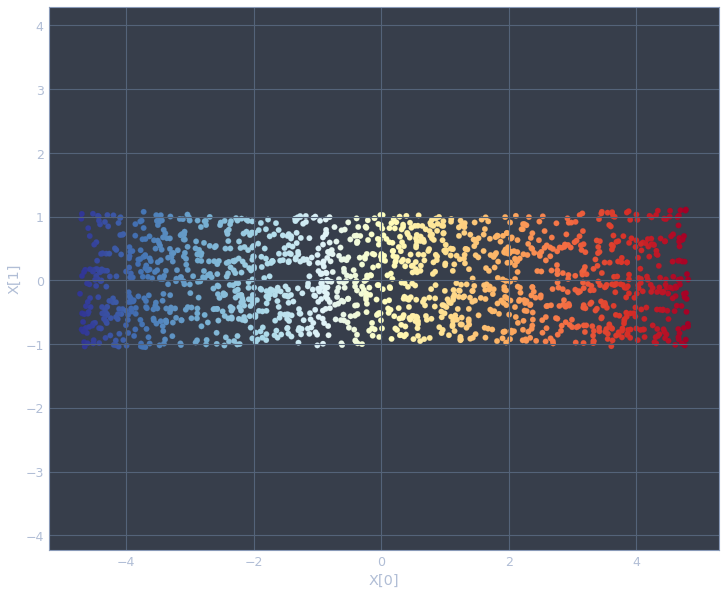

In [17]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
305   0.006811 -0.000004
201  -0.009365 -0.000224
369  -0.008490 -0.018069
626  -0.027212  0.020205
1345 -0.019737  0.020038
426   0.010075 -0.001722
1138 -0.008722 -0.009585
452  -0.032856 -0.030184
333  -0.024508 -0.024037
1412 -0.015017  0.002894


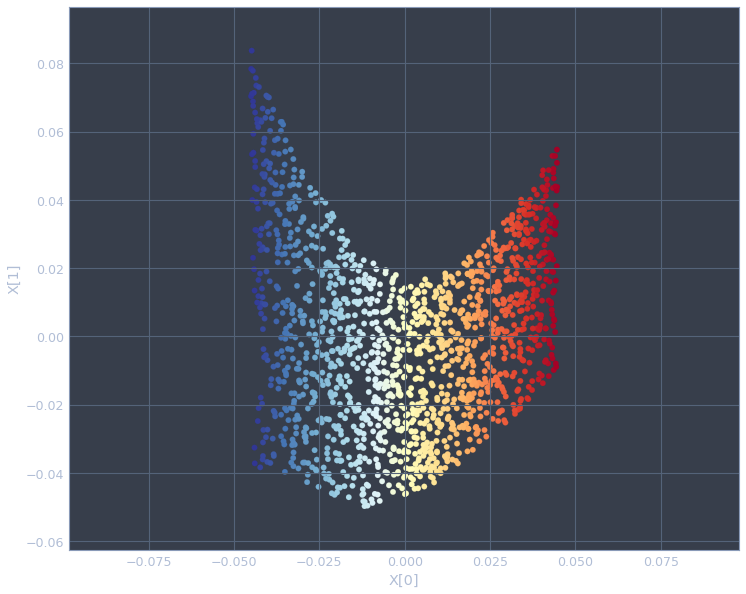

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') ) 

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (1500, 2)

Sample X : 

             0         1
573  -0.010330 -0.022744
475  -0.001416 -0.005591
582   0.030104 -0.039843
773   0.043489  0.022642
1137 -0.039806 -0.028701
323   0.033262 -0.036918
990   0.023009  0.009404
1274  0.036798  0.009038
350   0.018110 -0.040234
1248  0.026682 -0.012008


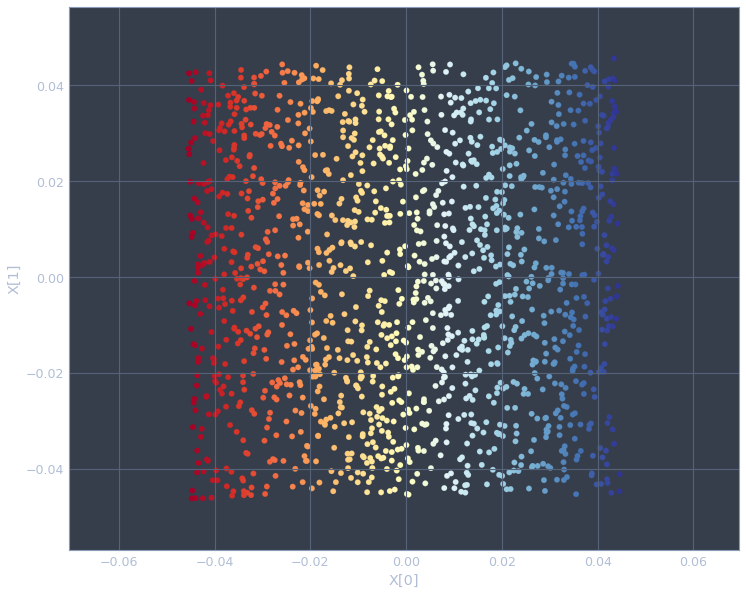

In [19]:
hlle = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))